Particle Swarm found global best in:  [0.00017178 0.00099683]  with value 0.2500000502


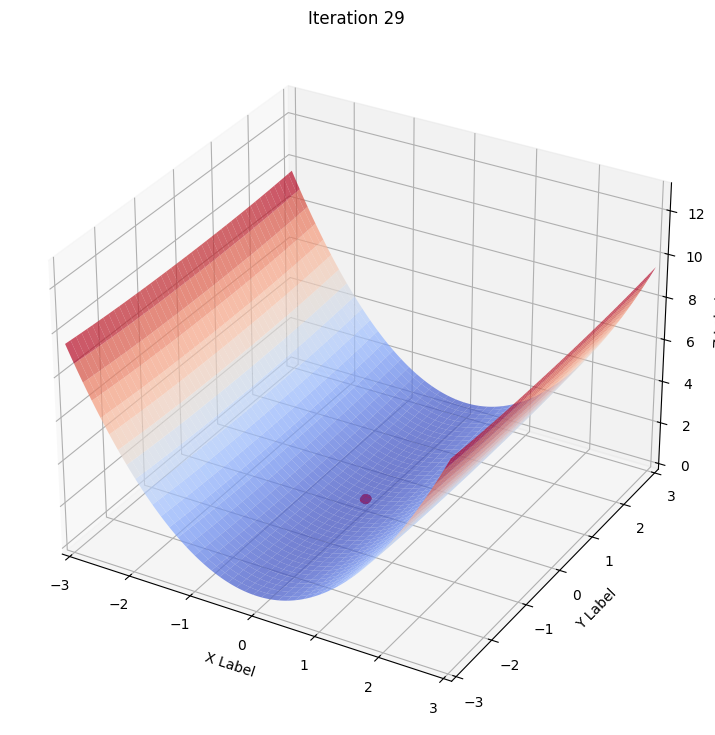

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from matplotlib.animation import FuncAnimation

def f(x,y):
    "Function"
    return (1/(2+np.sin(y)*(2/y)))+x**2
    # return np.abs(np.sin(x**2))+y**2
    # return (2+x**2)+y**2
    # return 4*x**2+2*y**2+2*x+1

weight=0.6 # how much inertia the particles have
alfa = beta = 2
particles = 20

#filling 2d position and speed arrays 
np.random.seed(0)
X = np.random.uniform(-3, 3, size=(2, particles))   # you can multiply bigger or smaller numbers depending on how "dense" the function is in its low values
V = np.zeros((2,particles))


result = f(X[0],X[1]) # array that contains the Z value of each particle. could I have named it Z? yeah

p_best = X.copy() # personal best coordinates of eacch particle 
g_best = p_best[:, result.argmin()] # [:,] global best coordinates
g_best_f = f(g_best[0],g_best[1]) # apply the function f to the coordinates g_best and get back the best minimum value

iterations = 30


XP = np.linspace(-3,3,180)
YP = XP
Xc,Yc = np.meshgrid(XP,YP)
Zc = f(Xc,Yc)


def update(p_best, g_best, X, V, result):
    global g_best_f
    epsilon1 = np.random.rand() 
    epsilon2 = np.random.rand() 
    V = weight * V + alfa *epsilon1 *(g_best.reshape(-1,1)-X) + beta * epsilon2 * (p_best-X)
    X += V
    new_f_vals = f(X[0], X[1])
    p_best[:, (result >= new_f_vals)] = X[:, (result >= new_f_vals)] #take the values in x where the old values are worse and put them in the same places in the p_best array
    result = f(p_best[0], p_best[1]) 
    g_best = p_best[:, result.argmin()]
    g_best_f = f(g_best[0], g_best[1])
    return p_best, g_best, X, V, result

def animate(i):
    global p_best, g_best, X, V, result, g_best_f
    ax.clear()
    title = "Iteration {}".format(i) 
    ax.set_title(title)
    ax.set_xlim([-3,3]) # you MUST choose appropriate x and y values so that the function isn't squished nor stretched or compressed
    ax.set_ylim([-3,3])
    ax.set_zlim([0,13]) # you MUST choose an appropriate z value so that the function doesn't go above the plot and particle are not pushed above negative values
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    Z = f(p_best[0], p_best[1])  
    ax.plot_surface(Xc, Yc, Zc, linewidth=0, cmap=cm.coolwarm, antialiased=True, alpha=0.7)
    ax.scatter(p_best[0], p_best[1], Z, alpha=1, color="red") 
    if i!=0: # this has to be done since matplotlib performs two iteration the first time it runs to draw the plot
        p_best, g_best, X, V, result = update(p_best, g_best, X, V, result)
    # rather than using an if you could use an init_func to initialize the plot

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 9))
anim = FuncAnimation(fig, animate, frames=iterations, interval=250, blit=False, init_func=None)

anim.save("PSO.gif", dpi=120, writer="ffmpeg")

print("Particle Swarm found global best in: ", g_best, " with value {:.10f}".format(g_best_f))

plt.show()



